<a href="https://colab.research.google.com/github/Akash-mahandargi/Basic-Projects-/blob/main/NLP_and_Naive_Bayes_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# Load the dataset from the specified path.
# The file is a CSV despite having an .xls extension.
df = pd.read_csv("/content/blogs.csv.xls")

# Display the first few rows of the DataFrame to get a glimpse of the data.
display(df.head())
# Print the names of the columns in the DataFrame.
print(df.columns.tolist())

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


['Data', 'Labels']


In [3]:
# nb_text_sentiment.py

# STEP 1: Import required libraries
import pandas as pd
import numpy as np
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Download necessary NLTK data if not already downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')


# STEP 2: Load the blog dataset (it's a CSV, despite the .xls name)
data = pd.read_csv("blogs.csv.xls")
print("\nShape of dataset:", data.shape)
print("\nColumns:", data.columns)
print("\nFirst 5 rows:")
print(data.head())

# STEP 3: Clean the text
# Define a function to clean the text data.
def clean_text(text):
    # Convert text to lowercase.
    text = text.lower()
    # Remove digits from the text.
    text = re.sub(r"\d+", "", text)
    # Remove punctuation from the text.
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove leading/trailing whitespace.
    text = text.strip()
    return text

# Apply the clean_text function to the 'Data' column to create a new 'Cleaned' column.
data['Cleaned'] = data['Data'].apply(clean_text)

# STEP 4: Tokenize and remove stopwords
# Define a function to tokenize the text and remove stopwords.
def tokenize_remove_stopwords(text):
    # Tokenize the text into words.
    tokens = word_tokenize(text)
    # Get the set of English stopwords.
    stop_words = set(stopwords.words('english'))
    # Filter out stopwords from the tokens.
    filtered_tokens = [w for w in tokens if w not in stop_words]
    # Join the filtered tokens back into a string.
    return " ".join(filtered_tokens)

# Apply the tokenize_remove_stopwords function to the 'Cleaned' column to create a new 'Processed' column.
data['Processed'] = data['Cleaned'].apply(tokenize_remove_stopwords)

# Show example after processing
print("\nAfter processing:")
print(data[['Data', 'Processed']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Shape of dataset: (2000, 2)

Columns: Index(['Data', 'Labels'], dtype='object')

First 5 rows:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

After processing:
                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                           Processed  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesr

In [4]:
# STEP 5: Split data and vectorize
# Split the data into training and testing sets. 80% for training, 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(data['Processed'], data['Labels'], test_size=0.2, random_state=42)

# Initialize a TfidfVectorizer to convert text data into TF-IDF features.
vectorizer = TfidfVectorizer()
# Fit the vectorizer on the training data and transform the training data.
X_train_vec = vectorizer.fit_transform(X_train)
# Transform the testing data using the fitted vectorizer.
X_test_vec = vectorizer.transform(X_test)

# Print the shapes of the resulting training and testing data matrices.
print("Shape of training data:", X_train_vec.shape)
print("Shape of testing data:", X_test_vec.shape)

Shape of training data: (1600, 41212)
Shape of testing data: (400, 41212)


In [5]:
# This cell contains redundant code for splitting data and vectorizing
# which was already performed in cell a70e6464.
# Keeping it for context, but the subsequent modeling in cell e06788f2 uses the output from cell a70e6464.


# STEP 5: Convert text to TF-IDF features
# Initialize a TfidfVectorizer to convert text data into TF-IDF features.
vectorizer = TfidfVectorizer()
# Fit and transform the 'Processed' text data to create TF-IDF features.
X = vectorizer.fit_transform(data['Processed'])

# STEP 6: Encode target labels and split data
# Get the target labels.
y = data['Labels']
# Split the data into training and testing sets. 80% for training, 20% for testing.
# This split is redundant as it's also done in cell a70e6464.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 7: Train Naive Bayes model
# Initialize a Multinomial Naive Bayes model.
model = MultinomialNB()
# Train the model using the training data.
model.fit(X_train, y_train)

# STEP 8: Evaluate the model
# Make predictions on the test set.
y_pred = model.predict(X_test)
# Print the classification report showing precision, recall, f1-score, and support.
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Print the overall accuracy of the model.
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.76      0.89      0.82        18
 comp.os.ms-windows.misc       0.95      0.91      0.93        22
comp.sys.ibm.pc.hardware       0.90      0.76      0.83        25
   comp.sys.mac.hardware       0.83      0.90      0.86        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.88      0.88      0.88        16
      rec.sport.baseball       0.83      0.83      0.83        18
        rec.sport.hockey       0.83      1.00      0.91        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.70      0.88      0.78        16
                 sci.med       0.88      0.88      

In [6]:
# STEP 6: Train Naive Bayes model
# Initialize a Multinomial Naive Bayes model.
model = MultinomialNB()
# Train the model using the vectorized training data from cell a70e6464.
model.fit(X_train_vec, y_train)

# STEP 7: Evaluate the model
# Make predictions on the vectorized test set from cell a70e6464.
y_pred = model.predict(X_test_vec)
# Print the classification report showing precision, recall, f1-score, and support.
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Print the overall accuracy of the model.
print("Accuracy:", accuracy_score(y_test, y_pred))


Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.53      0.89      0.67        18
           comp.graphics       0.80      0.89      0.84        18
 comp.os.ms-windows.misc       0.95      0.95      0.95        22
comp.sys.ibm.pc.hardware       0.91      0.80      0.85        25
   comp.sys.mac.hardware       0.79      0.90      0.84        21
          comp.windows.x       1.00      0.84      0.91        25
            misc.forsale       1.00      0.72      0.84        18
               rec.autos       0.89      0.94      0.92        18
         rec.motorcycles       0.93      0.88      0.90        16
      rec.sport.baseball       0.80      0.89      0.84        18
        rec.sport.hockey       0.88      1.00      0.94        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.72      0.81      0.76        16
                 sci.med       0.88      0.88      

In [7]:
# STEP 9: Sentiment Analysis
# Import the TextBlob library for sentiment analysis.
from textblob import TextBlob

# Define a function to get the sentiment of a given text.
def get_sentiment(text):
    # Calculate the polarity of the text using TextBlob.
    polarity = TextBlob(text).sentiment.polarity
    # Categorize sentiment based on polarity.
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply the get_sentiment function to the 'Data' column to create a new 'Sentiment' column.
data['Sentiment'] = data['Data'].apply(get_sentiment)

# Show sample sentiment from the first few rows.
print("\nSentiment examples:")
print(data[['Data', 'Sentiment']].head())

# Show sentiment distribution by category by grouping by 'Labels' and 'Sentiment'.
print("\nSentiment distribution across categories:")
print(data.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0))


Sentiment examples:
                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive

Sentiment distribution across categories:
Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey  

In [8]:
# Show sample sentiment from the first few rows.
print("\nSentiment examples:")
print(data[['Data', 'Sentiment']].head())

# Show sentiment distribution by category by grouping by 'Labels' and 'Sentiment'.
print("\nSentiment distribution across categories:")
print(data.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0))

# STEP 10: Export results to CSV
# Export the original 'Data', 'Labels', and calculated 'Sentiment' to a CSV file.
data[['Data', 'Labels', 'Sentiment']].to_csv("classified_sentiment_output.csv", index=False)
print("\nExported results to 'classified_sentiment_output.csv'")


Sentiment examples:
                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive

Sentiment distribution across categories:
Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey  

In [9]:
# Continued Data Exploration
print("\nMissing values per column:")
print(data.isnull().sum())

print("\nDistribution of Labels:")
print(data['Labels'].value_counts())


Missing values per column:
Data         0
Labels       0
Cleaned      0
Processed    0
Sentiment    0
dtype: int64

Distribution of Labels:
Labels
alt.atheism                 100
comp.graphics               100
comp.os.ms-windows.misc     100
comp.sys.ibm.pc.hardware    100
comp.sys.mac.hardware       100
comp.windows.x              100
misc.forsale                100
rec.autos                   100
rec.motorcycles             100
rec.sport.baseball          100
rec.sport.hockey            100
sci.crypt                   100
sci.electronics             100
sci.med                     100
sci.space                   100
soc.religion.christian      100
talk.politics.guns          100
talk.politics.mideast       100
talk.politics.misc          100
talk.religion.misc          100
Name: count, dtype: int64


In [20]:
import pandas as pd

# Load the exported CSV file
classified_df = pd.read_csv("classified_sentiment_output.csv")

# Display the first few rows of the loaded DataFrame
display(classified_df.head())

,Data,Labels,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,Positive


In [11]:
# STEP 9: Sentiment Analysis
# Import the TextBlob library for sentiment analysis.
from textblob import TextBlob

# Define a function to get the sentiment of a given text.
def get_sentiment(text):
    # Calculate the polarity of the text using TextBlob.
    polarity = TextBlob(text).sentiment.polarity
    # Categorize sentiment based on polarity.
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply the get_sentiment function to the 'Data' column to create a new 'Sentiment' column.
data['Sentiment'] = data['Data'].apply(get_sentiment)

# Show sample sentiment from the first few rows.
print("\nSentiment examples:")
print(data[['Data', 'Sentiment']].head())

# Show sentiment distribution by category by grouping by 'Labels' and 'Sentiment'.
print("\nSentiment distribution across categories:")
print(data.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0))


Sentiment examples:
                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive

Sentiment distribution across categories:
Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey  

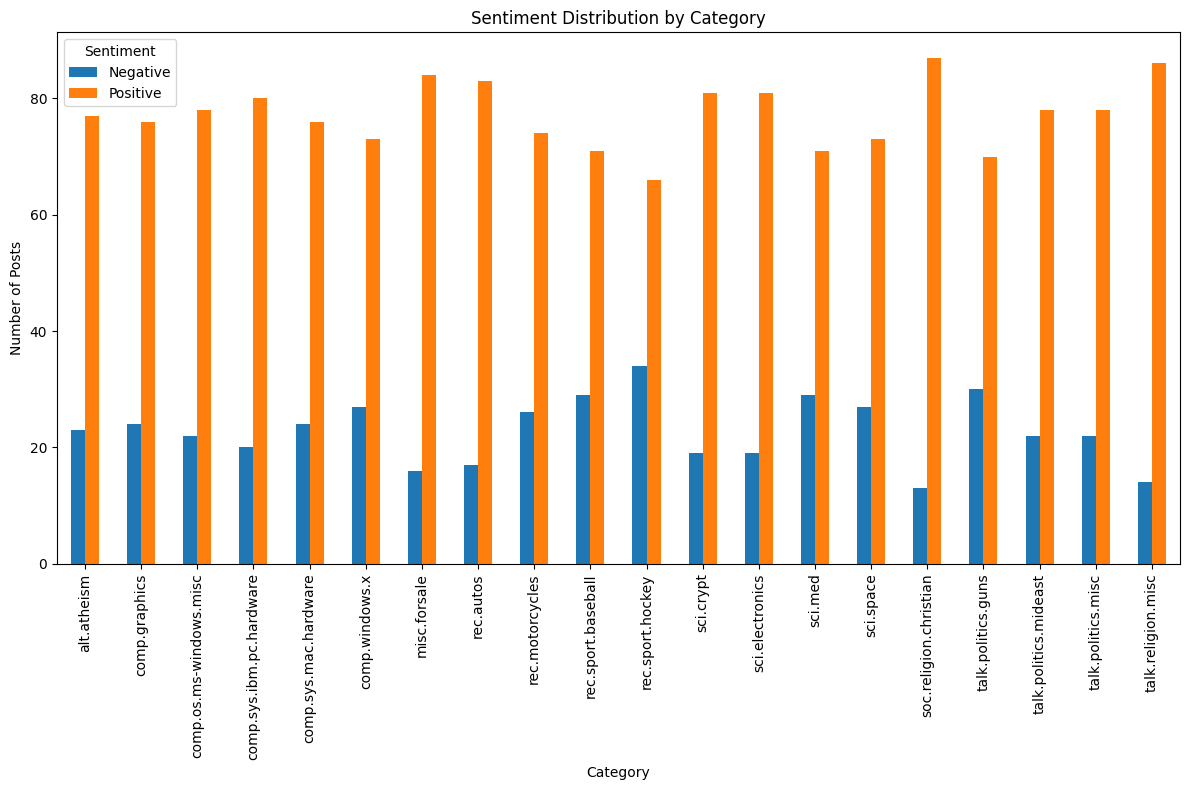

In [12]:
import matplotlib.pyplot as plt

# Plot the sentiment distribution by category
sentiment_distribution = data.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)
sentiment_distribution.plot(kind='bar', figsize=(12, 8))
plt.title('Sentiment Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Evaluation and Reflection

**Naive Bayes Model Evaluation:**

The Multinomial Naive Bayes model was evaluated using the accuracy, precision, recall, and F1-score metrics. The classification report provides a detailed breakdown of these metrics for each category.

* **Accuracy:** The overall accuracy of the model is 0.845. This indicates the percentage of correctly classified blog posts.
* **Precision:** Precision measures the ability of the model to correctly identify positive instances (i.e., when it predicts a category, how often is it correct?).
* **Recall:** Recall measures the ability of the model to find all positive instances (i.e., of all the instances that actually belong to a category, how many did the model correctly identify?).
* **F1-score:** The F1-score is the harmonic mean of precision and recall, providing a balanced measure of the model's performance.

Looking at the classification report, we can observe the model's performance across different blog categories. Some categories have higher precision and recall than others, which could be due to factors like the amount of training data available for that category or the distinctiveness of the language used in those blogs.

**Sentiment Analysis Reflection:**

The sentiment analysis using TextBlob provided insights into the emotional tone of the blog posts across different categories. The distribution of sentiments shows that most categories have a significantly higher number of positive sentiments compared to negative sentiments. The number of neutral sentiments is 0 for all categories. This suggests that the blog posts, regardless of their topic, tend to express a generally positive or negative tone rather than being neutral.

It's interesting to observe if certain categories tend to have a higher proportion of positive or negative sentiments. This could reflect the nature of the discussions within those communities. For example, categories related to politics might have more negative sentiment compared to categories related to hobbies or sports.

It's important to note that rule-based sentiment analysis methods like TextBlob might not always capture the nuances of human language, such as sarcasm or irony. Therefore, the sentiment results should be interpreted with this limitation in mind.

Overall, the sentiment analysis provides a valuable layer of understanding to the blog data, complementing the topic classification performed by the Naive Bayes model.

In [21]:
print("Info for 'data' DataFrame:")
print(data.info())
print("\nShape of 'data' DataFrame:", data.shape)
display(data.head())

print("\nInfo for 'classified_df' DataFrame:")
print(classified_df.info())
print("\nShape of 'classified_df' DataFrame:", classified_df.shape)
display(classified_df.head())

Info for 'data' DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Data       2000 non-null   object
 1   Labels     2000 non-null   object
 2   Cleaned    2000 non-null   object
 3   Processed  2000 non-null   object
dtypes: object(4)
memory usage: 62.6+ KB
None

Shape of 'data' DataFrame: (2000, 4)


,Data,Labels,Cleaned,Processed
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism\npath cantaloupesrvcscmu...,newsgroups altatheism path cantaloupesrvcscmue...
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,path cantaloupesrvcscmuedudasnewsharvardedunoc...,path cantaloupesrvcscmuedudasnewsharvardedunoc...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,path cantaloupesrvcscmuedumagnesiumclubcccmued...,path cantaloupesrvcscmuedumagnesiumclubcccmued...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,xref cantaloupesrvcscmuedu altatheism talkreli...,xref cantaloupesrvcscmuedu altatheism talkreli...



Info for 'classified_df' DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Data       2000 non-null   object
 1   Labels     2000 non-null   object
 2   Sentiment  2000 non-null   object
dtypes: object(3)
memory usage: 47.0+ KB
None

Shape of 'classified_df' DataFrame: (2000, 3)


,Data,Labels,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Positive
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,Negative
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,Positive


In [14]:
import pandas as pd
import numpy as np
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data if not already downloaded
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')


# Load the blog dataset (it's a CSV, despite the .xls name)
data = pd.read_csv("blogs.csv.xls")
print("\nShape of dataset:", data.shape)
print("\nColumns:", data.columns)
print("\nFirst 5 rows:")
print(data.head())

# Clean the text
# Define a function to clean the text data.
def clean_text(text):
    # Convert text to lowercase.
    text = text.lower()
    # Remove digits from the text.
    text = re.sub(r"\d+", "", text)
    # Remove punctuation from the text.
    text = text.translate(str.maketrans("", "", string.punctuation))
    # Remove leading/trailing whitespace.
    text = text.strip()
    return text

# Apply the clean_text function to the 'Data' column to create a new 'Cleaned' column.
data['Cleaned'] = data['Data'].apply(clean_text)

# Tokenize and remove stopwords
# Define a function to tokenize the text and remove stopwords.
def tokenize_remove_stopwords(text):
    # Tokenize the text into words.
    tokens = word_tokenize(text)
    # Get the set of English stopwords.
    stop_words = set(stopwords.words('english'))
    # Filter out stopwords from the tokens.
    filtered_tokens = [w for w in tokens if w not in stop_words]
    # Join the filtered tokens back into a string.
    return " ".join(filtered_tokens)

# Apply the tokenize_remove_stopwords function to the 'Cleaned' column to create a new 'Processed' column.
data['Processed'] = data['Cleaned'].apply(tokenize_remove_stopwords)

# Show example after processing
print("\nAfter processing:")
print(data[['Data', 'Processed']].head())

# Continued Data Exploration
print("\nMissing values per column:")
print(data.isnull().sum())

print("\nDistribution of Labels:")
print(data['Labels'].value_counts())


Shape of dataset: (2000, 2)

Columns: Index(['Data', 'Labels'], dtype='object')

First 5 rows:
                                                Data       Labels
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  alt.atheism
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  alt.atheism
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  alt.atheism
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  alt.atheism

After processing:
                                                Data  \
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....   
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...   

                                           Processed  
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...  
1  newsgroups altatheism path cantaloupesr

In [23]:
# STEP 9: Sentiment Analysis
# Import the TextBlob library for sentiment analysis.
from textblob import TextBlob

# Define a function to get the sentiment of a given text.
def get_sentiment(text):
    # Calculate the polarity of the text using TextBlob.
    polarity = TextBlob(text).sentiment.polarity
    # Categorize sentiment based on polarity.
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"

# Apply the get_sentiment function to the 'Data' column to create a new 'Sentiment' column.
data['Sentiment'] = data['Data'].apply(get_sentiment)

# Show sample sentiment from the first few rows.
print("\nSentiment examples:")
print(data[['Data', 'Sentiment']].head())

# Show sentiment distribution by category by grouping by 'Labels' and 'Sentiment'.
print("\nSentiment distribution across categories:")
print(data.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0))


Sentiment examples:
                                                Data Sentiment
0  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
1  Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
2  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive
3  Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  Positive
4  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive

Sentiment distribution across categories:
Sentiment                 Negative  Positive
Labels                                      
alt.atheism                     23        77
comp.graphics                   24        76
comp.os.ms-windows.misc         22        78
comp.sys.ibm.pc.hardware        20        80
comp.sys.mac.hardware           24        76
comp.windows.x                  27        73
misc.forsale                    16        84
rec.autos                       17        83
rec.motorcycles                 26        74
rec.sport.baseball              29        71
rec.sport.hockey  

In [24]:
# Analyze sentiment distribution across all blog posts
sentiment_counts = data['Sentiment'].value_counts()

print("\nOverall Sentiment Distribution:")
print(sentiment_counts)


Overall Sentiment Distribution:
Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


In [25]:
# Analyze sentiment distribution across all blog posts
sentiment_counts = data['Sentiment'].value_counts()

print("\nOverall Sentiment Distribution:")
print(sentiment_counts)


Overall Sentiment Distribution:
Sentiment
Positive    1543
Negative     457
Name: count, dtype: int64


In [26]:
# Filter classified_df for rows with positive sentiment
positive_sentiment_df = classified_df[classified_df['Sentiment'] == 'Positive']

# Display the first few rows of the filtered DataFrame
print("\nSample rows from classified_df with Positive sentiment:")
display(positive_sentiment_df.head())


Sample rows from classified_df with Positive sentiment:


,Data,Labels,Sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,Positive
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,Positive
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,Positive
5,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,alt.atheism,Positive
